## Sources:

### Guides
https://pigeonsupermodel.com/DLC_StudentGuide.html#create-a-deeplabcut-project

### References
[On the inference speed and video-compression robustness of DeepLabCut](https://www.biorxiv.org/content/10.1101/457242v1)


In [1]:
import deeplabcut as dlc

print(f'Successfully imported DeepLabCut version: {dlc. __version__}')

Loading DLC 3.0.0rc6...
Successfully imported DeepLabCut version: 3.0.0rc6


In [4]:
import glob 

# Requires forward slashes `/` and a trailing `/`
EXPERIMENT_DIR = r'F:/251215_ETOH_RO1/'
PROCESSED_DIR = r'F:/251215_ETOH_RO1/processed/'

videolist = []
#find all videos in the directory and subdirectories
for video in glob.glob(EXPERIMENT_DIR + 'data/**/*.mp4', recursive=True):
    videolist.append(video)
    
print(f'found {len(videolist)} videos in the directory.')
del(videolist)

found 36 videos in the directory.


#### Alternative symlinking scattered files into a single folder

In [5]:
"""
Created on Thu Jul 24 15:32:26 2025

@author: jgronemeyer

Gather all files matching a glob pattern in a parent directory and create links to them in a new folder.

Will skip files that already exist in the target folder.
"""

import os
import fnmatch

# ─── configuration ─────────────────────────────────────────────────────      
FILE_PATTERN = '*pupil.mp4'               # Glob pattern (supports *, ?, [..])
LINK_FOLDER = 'pupil_mp4_links' # Name of the subfolder for symlinks

# ─── IMPLEMENTATION ────────────────────────────────────────────────────────
video_folder = os.path.join(PROCESSED_DIR, LINK_FOLDER)
videolist = []
os.makedirs(video_folder, exist_ok=True)

for root, _, files in os.walk(EXPERIMENT_DIR):
    for name in files:
        if not fnmatch.fnmatch(name, FILE_PATTERN):
            continue

        src = os.path.abspath(os.path.join(root, name))
        dst = os.path.join(video_folder, name)
        if os.path.exists(dst):
            if dst not in videolist:
                videolist.append(dst)
            continue

        try:
            os.symlink(src, dst)
            print(f"Symlinked: {name}")
        except OSError as e:
            # Likely WinError 1314: no privilege → fall back to hard link
            try:
                os.link(src, dst)
                print(f"Hard‑linked: {name}")
            except OSError as he:
                print(f"Failed to link {name!r}: {he}")
                videolist.append(dst)


Hard‑linked: 20251215_142459_sub-GS26_ses-01_task-spont_pupil.mp4
Hard‑linked: 20251215_144510_sub-GS26_ses-01_task-movies_pupil.mp4
Hard‑linked: 20251215_144817_sub-GS26_ses-01_task-movies_pupil.mp4
Hard‑linked: 20251216_145948_sub-GS26_ses-02_task-spont_pupil.mp4
Hard‑linked: 20251216_152003_sub-GS26_ses-02_task-movies_pupil.mp4
Hard‑linked: 20251217_145114_sub-GS26_ses-03_task-spont_pupil.mp4
Hard‑linked: 20251217_151122_sub-GS26_ses-03_task-movies_pupil.mp4
Hard‑linked: 20251218_150032_sub-GS26_ses-04_task-spont_pupil.mp4
Hard‑linked: 20251218_152121_sub-GS26_ses-04_task-movies_pupil.mp4
Hard‑linked: 20251218_152554_sub-GS26_ses-04_task-movies_pupil.mp4
Hard‑linked: 20251215_151240_sub-GS27_ses-01_task-spont_pupil.mp4
Hard‑linked: 20251215_153312_sub-GS27_ses-01_task-movies_pupil.mp4
Hard‑linked: 20251216_154725_sub-GS27_ses-02_task-spont_pupil.mp4
Hard‑linked: 20251216_160732_sub-GS27_ses-02_task-movies_pupil.mp4
Hard‑linked: 20251217_153955_sub-GS27_ses-03_task-spont_pupil.mp4
Ha

In [6]:
'''
Identify videos in the symlinked folder that do not have a corresponding pickle file in the processed folder.

This indicates the video has not been processed yet. 
'''

import re
import os
import glob

pickle_files = glob.glob(PROCESSED_DIR + '/**/*full.pickle', recursive=True)

pickle_subs = set()
for p in pickle_files:
    filename = os.path.basename(p)
    match = re.search(r'sub-(\w+)_ses-(\d+)', filename)
    if match:
        sub, ses = match.groups()
        pickle_subs.add((sub, ses))

unprocessed_videos = []
for v in videolist:
    filename = os.path.basename(v)
    match = re.search(r'sub-(\w+)_ses-(\d+)', filename)
    if match:
        sub, ses = match.groups()
        if (sub, ses) not in pickle_subs:
            unprocessed_videos.append(v)

#print(unprocessed_videos)

### Create a new DLC project configuration

In [ ]:
config_path = dlc.create_new_project(project='ETOH-R01', 
                                     experimenter='jgronemeyer', 
                                     videos=unprocessed_videos, 
                                     working_directory=PROCESSED_DIR + 'dlc/', 
                                     copy_videos=False, 
                                     multianimal=False)

Project "F:\251205_ETOH_RO1\processed\dlc\ETOH-R01-jgronemeyer-2025-12-18" already exists!


'\nWe can inject this snippet into our `bodyparts` section when doing an 8-point pupil analysis:\n\nbodyparts:\n- Pupil1\n- Pupil2\n- Pupil3\n- Pupil4\n- Pupil5\n- Pupil6\n- Pupil7\n- Pupil8\n\n'

**Skip the previous cell if you already have a config.yaml. Setting your config.yaml path to this notebook's `config_path` variable.**

In [7]:
config_path = r"F:\251205_ETOH_RO1\processed\dlc\ETOH-R01-jgronemeyer-2025-12-18\config.yaml"

#### Programmatically inject bodypart configuration into the DLC config.yaml

This helps skip the process of editing the config file via the gui, especially the most laborious aspect: adding the list of body parts. 

This also helps promote standardization across projects (ie. you don't need to remember if your previous configs used "Pupil1" or "pupil1" or "pupil_1" each time you create a config)

In [ ]:
# We can inject this snippet into our config.yaml `bodyparts:` section when doing an 8-point pupil analysis:

import re

bodyparts = [
    'Pupil1',
    'Pupil2',
    'Pupil3',
    'Pupil4',
    'Pupil5',
    'Pupil6',
    'Pupil7',
    'Pupil8',
]

with open(config_path) as f:
    text = f.read()

bp_block = "bodyparts:\n" + "".join(f"  - {bp}\n" for bp in bodyparts)

new_text, count = re.subn(r"(?m)^bodyparts:\n(?:\s*-\s*.*\n)*", bp_block, text, count=1)
if count != 1:
    raise RuntimeError("Could not replace bodyparts block in config file.")

with open(config_path, "w") as f:
    f.write(new_text)

### DLC Project File Structure:

- dlc-models: After training your model, this directory will hold the specialized model weights that you can later use to analyze new videos.

- labeled-data: This directory stores the extracted frames & manual annotated labels for each video.

- training-datasets: This directory stores the datasets that will be used to train the model.

- videos: This directory stores either the videos you want to analyze or symbolic links to the video files (depending on whether you set copy_videos=True/False when creating the project).


### Load a current project configuration![DeepLabCut Documentation/DeepLabCut user Guide (for single animal projects).](Box1-01-1.webp)
DeepLabCut Documentation/DeepLabCut user Guide (for single animal projects).



**bodyparts**: The whole point of DeepLabCut is to track different bodyparts on a given animal. Therefore, in this parameter you have to define the key features you want to track throughout your video files. Use the notation that is already given by the dummy entries in the config.file (e.g. - NameOfBodypart).

**numframes2pick**: This parameter specifies, how many frames will be extracted from each of your video files in the following step for manual labeling. The total number of labeled frames will later make up the size of your training dataset. There is no fixed specification on how large the training dataset should be (as this largely depends on your amount of videos, video quality, number of included animals, …). However, the general rule is: the bigger, the better. For a start, I would aim for a size of at least 200 frames. Therefore, only adapt this parameter if you have a whole lot of videos. Otherwise, just leave it as it is for now.

**skeleton**: Here, you can specify connections between your tracked bodyparts. This will become relevant after the next step, when you plot your manually annotated frames to check whether all labels were positioned correctly. As with the bodyparts, take care to use the exact syntax that is specified in the dummy entries (e.g. tabs & spaces!).



**mode**: Here, you specify whether you want to manually pick the frames to be included into your training dataset (´manual´) or if you want DeepLabCut to do it for you according to a specific algorithm you can define in the next parameter (automatic).

**algo**: When you set the mode parameter to automatic, here, you specify the algorithm that will be used to extract frames. Setting this parameter to uniform will cause DeepLabCut to select frames in a temporally uniformly distributed way (e.g. “one frame per 1000 frames”). Normally, I recommend setting this parameter to kmeans. This will select frames by clustering based on visual appereance - meaning, it will select frames that depict different forms of behavior even if they occur only occasionally throughout the video. However, slecting frames by clutering is also more time consuming than selecting them uniformly.

**userfeedback**: This parameter is set to False per default. Setting this to True will cause DeepLabCut to check for user approval for every frame throughout the extraction (very time consuming!).

**crop**: Setting this parameter to True will cause a GUI to pop up and ask the user to draw a box onto the frame, selecting the area of interest. The extracted frames will then be cropped in into this are. (This usually only makes sense, when your camera captures a much larger space than were the behavior of interest took place.)


### Extract Frames

In [ ]:
dlc.extract_frames(config_path, mode='automatic', algo='kmeans', userfeedback=False, crop=False)

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 8.9  seconds.
Extracting and downsampling... 178  frames from the video.


178it [00:00, 1404.27it/s]

Kmeans clustering ... (this might take a while)


Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.35  seconds.
Extracting and downsampling... 23607  frames from the video.


23607it [00:15, 1510.92it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.5  seconds.
Extracting and downsampling... 23610  frames from the video.


23610it [00:15, 1507.69it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.4  seconds.
Extracting and downsampling... 23608  frames from the video.


23608it [00:15, 1510.51it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.8  seconds.
Extracting and downsampling... 23616  frames from the video.


23616it [00:15, 1509.82it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1176.95  seconds.
Extracting and downsampling... 23539  frames from the video.


23539it [00:15, 1506.50it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.55  seconds.
Extracting and downsampling... 23611  frames from the video.


23611it [00:15, 1516.50it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.6  seconds.
Extracting and downsampling... 23612  frames from the video.


23612it [00:15, 1504.61it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.7  seconds.
Extracting and downsampling... 23614  frames from the video.


23614it [00:15, 1490.02it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1177.8  seconds.
Extracting and downsampling... 23556  frames from the video.


23556it [00:15, 1476.04it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.75  seconds.
Extracting and downsampling... 23615  frames from the video.


23615it [00:15, 1484.40it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.65  seconds.
Extracting and downsampling... 23613  frames from the video.


23613it [00:15, 1499.09it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.75  seconds.
Extracting and downsampling... 23615  frames from the video.


23615it [00:15, 1477.62it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1178.1  seconds.
Extracting and downsampling... 23562  frames from the video.


23562it [00:15, 1483.78it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1181.05  seconds.
Extracting and downsampling... 23621  frames from the video.


23621it [00:15, 1489.60it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.55  seconds.
Extracting and downsampling... 23611  frames from the video.


23611it [00:15, 1479.22it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1180.75  seconds.
Extracting and downsampling... 23615  frames from the video.


13737it [00:09, 1482.17it/s]

### Label Frames

This will launch `Napari` for labeling.

In `Napari` go to `File` -> `Open Folder` 
Then navigate to the *`DLC_PROJECT_ROOT/labeled-data`*
Then, double click a folder and when prompted by Napari to use the DLC plugin `napari DeepLabCut` when loading files, click `OK` and checkmark `remember` (The prompt has this all by default)

The workflow then entails labeling, saving (ctr + s), then opening the next folder. Whether you want to close the napari and rerun the cell is up to you. 

General Notes:
- If you are not reopening Napari, make sure you delete the previous layer after opening a new folder.
- Make sure you select the `CollectedData_urname` for labeling 
- You can use `2` on the keyboard to shortcut labeling points

In [18]:
dlc.label_frames(config_path)

### Create the training dataset

In [20]:
dlc.create_training_dataset(config_path)

F:\251205_ETOH_RO1\processed\dlc\ETOH-R01-jgronemeyer-2025-12-18\labeled-data\20251205_150626_sub-GS26_ses-01_task-widefield_pupil\CollectedData_jgronemeyer.h5  not found (perhaps not annotated).
F:\251205_ETOH_RO1\processed\dlc\ETOH-R01-jgronemeyer-2025-12-18\labeled-data\20251207_142541_sub-GS26_ses-03_task-widefield_pupil\CollectedData_jgronemeyer.h5  not found (perhaps not annotated).
F:\251205_ETOH_RO1\processed\dlc\ETOH-R01-jgronemeyer-2025-12-18\labeled-data\20251207_145657_sub-GS27_ses-03_task-widefield_pupil\CollectedData_jgronemeyer.h5  not found (perhaps not annotated).
F:\251205_ETOH_RO1\processed\dlc\ETOH-R01-jgronemeyer-2025-12-18\labeled-data\20251207_152750_sub-GS28_ses-03_task-widefield_pupil\CollectedData_jgronemeyer.h5  not found (perhaps not annotated).
F:\251205_ETOH_RO1\processed\dlc\ETOH-R01-jgronemeyer-2025-12-18\labeled-data\20251207_155844_sub-GS29_ses-03_task-widefield_pupil\CollectedData_jgronemeyer.h5  not found (perhaps not annotated).
F:\251205_ETOH_RO1\p

[(0.95,
  2,
  (array([ 54,  52,  91,  84,  38, 114,  15,  87,  63,  56,  74,  76,  66,
           58, 106, 132,  26,   4, 127,  37, 155, 123, 152,  42,  57, 154,
           98,  78, 112,  14, 102, 108,  65,  82, 107, 139,  60,  77,  16,
           81, 126,  59,  55,  47, 103, 134, 144, 105,  21, 110, 101, 113,
           49,  19, 135,  28,  86,   7,   6,  68,  72,  22, 133,  64, 100,
           96,  12, 143,  17, 148,  92, 119,  30, 150, 142,  25,  48, 109,
          147, 158,   1,  99,   8,  62,  80, 120,  69,  94,  75,   0,  36,
            5,  33,  88,  95,  34, 141,  97,  85,  61, 116, 151,  45, 128,
           10, 115, 153, 130,  50,  90, 122, 137, 131, 149,  73,   9,  39,
          136, 138,  29, 124,  20,  46,  51,  53,  23,  89, 157,  27,   2,
          145, 140, 156, 146,  32,  43,  35,   3,  67,  24, 125,  44, 159,
          129,  93, 111,  11,  40,  18,  41,  79,  71]),
   array([ 13,  31,  70, 121, 104,  83, 117, 118])))]

#### Train the Network

In [21]:
dlc.train_network(config_path)

Training with configuration:
data:
  colormode: RGB
  inference:
    normalize_images: True
  train:
    affine:
      p: 0.5
      rotation: 30
      scaling: [1.0, 1.0]
      translation: 0
    collate:
      type: ResizeFromDataSizeCollate
      min_scale: 0.4
      max_scale: 1.0
      min_short_side: 128
      max_short_side: 1152
      multiple_of: 32
      to_square: False
    covering: False
    gaussian_noise: 12.75
    hist_eq: False
    motion_blur: False
    normalize_images: True
device: auto
metadata:
  project_path: F:\251205_ETOH_RO1\processed\dlc\ETOH-R01-jgronemeyer-2025-12-18
  pose_config_path: F:\251205_ETOH_RO1\processed\dlc\ETOH-R01-jgronemeyer-2025-12-18\dlc-models-pytorch\iteration-0\ETOH-R01Dec18-trainset95shuffle1\train\pytorch_config.yaml
  bodyparts: ['Pupil1', 'Pupil2', 'Pupil3', 'Pupil4', 'Pupil5', 'Pupil6', 'Pupil7', 'Pupil8']
  unique_bodyparts: []
  individuals: ['animal']
  with_identity: None
method: bu
model:
  backbone:
    type: ResNet
    model_n

#### Evaluate the trained Network

In [24]:
dlc.evaluate_network(config_path, plotting=True)

100%|██████████| 5/5 [00:00<00:00, 86.14it/s]


Evaluation results for DLC_Resnet50_HFSA_cohort3Sep29shuffle1_snapshot_050-results.csv (pcutoff: 0.6):
train rmse              1.16
train rmse_pcutoff      1.16
train mAP              98.60
train mAR              99.16
test rmse               1.43
test rmse_pcutoff       1.43
test mAP              100.00
test mAR              100.00
Name: (0.95, 1, 50, -1, 0.6), dtype: float64


### Analyze Videos

~ 2 hours for 10 videos (23550 frames, 512x512, 20mins) on GTX 4090 24gb VRAM with batch_size=16 (GPU ussage 60-70%)

In [8]:
dlc.analyze_videos(config_path, unprocessed_videos, batch_size=16, save_as_csv=True)

Analyzing videos with F:\251205_ETOH_RO1\processed\dlc\ETOH-R01-jgronemeyer-2025-12-18\dlc-models-pytorch\iteration-0\ETOH-R01Dec18-trainset95shuffle1\train\snapshot-best-050.pt
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_142459_sub-GS26_ses-01_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23563
  Duration of video [s]:  1178.15
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23563/23563 [02:50<00:00, 138.42it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_142459_sub-GS26_ses-01_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_142459_sub-GS26_ses-01_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_144510_sub-GS26_ses-01_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    938
  Duration of video [s]:  46.90
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 938/938 [00:06<00:00, 135.31it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_144510_sub-GS26_ses-01_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_144510_sub-GS26_ses-01_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_144817_sub-GS26_ses-01_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11792
  Duration of video [s]:  589.60
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11792/11792 [01:25<00:00, 137.46it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_144817_sub-GS26_ses-01_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_144817_sub-GS26_ses-01_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_151240_sub-GS27_ses-01_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23611
  Duration of video [s]:  1180.55
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23611/23611 [03:00<00:00, 130.64it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_151240_sub-GS27_ses-01_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_151240_sub-GS27_ses-01_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_153312_sub-GS27_ses-01_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11802
  Duration of video [s]:  590.10
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11802/11802 [01:32<00:00, 128.22it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_153312_sub-GS27_ses-01_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_153312_sub-GS27_ses-01_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_160037_sub-GS28_ses-01_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23613
  Duration of video [s]:  1180.65
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23613/23613 [03:03<00:00, 128.54it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_160037_sub-GS28_ses-01_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_160037_sub-GS28_ses-01_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_162125_sub-GS28_ses-01_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11776
  Duration of video [s]:  588.80
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11776/11776 [01:33<00:00, 126.24it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_162125_sub-GS28_ses-01_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_162125_sub-GS28_ses-01_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_164209_sub-GS29_ses-01_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23611
  Duration of video [s]:  1180.55
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23611/23611 [03:04<00:00, 127.87it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_164209_sub-GS29_ses-01_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_164209_sub-GS29_ses-01_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_170233_sub-GS29_ses-01_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11785
  Duration of video [s]:  589.25
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11785/11785 [01:31<00:00, 128.73it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_170233_sub-GS29_ses-01_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251215_170233_sub-GS29_ses-01_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_145948_sub-GS26_ses-02_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23538
  Duration of video [s]:  1176.90
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23538/23538 [03:04<00:00, 127.64it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_145948_sub-GS26_ses-02_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_145948_sub-GS26_ses-02_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_152003_sub-GS26_ses-02_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11813
  Duration of video [s]:  590.65
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11813/11813 [01:31<00:00, 129.04it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_152003_sub-GS26_ses-02_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_152003_sub-GS26_ses-02_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_154725_sub-GS27_ses-02_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23610
  Duration of video [s]:  1180.50
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23610/23610 [03:05<00:00, 127.39it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_154725_sub-GS27_ses-02_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_154725_sub-GS27_ses-02_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_160732_sub-GS27_ses-02_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11812
  Duration of video [s]:  590.60
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11812/11812 [01:33<00:00, 125.75it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_160732_sub-GS27_ses-02_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_160732_sub-GS27_ses-02_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_163235_sub-GS28_ses-02_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23620
  Duration of video [s]:  1181.00
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23620/23620 [03:05<00:00, 127.45it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_163235_sub-GS28_ses-02_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_163235_sub-GS28_ses-02_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_165336_sub-GS28_ses-02_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11816
  Duration of video [s]:  590.80
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11816/11816 [01:32<00:00, 127.28it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_165336_sub-GS28_ses-02_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_165336_sub-GS28_ses-02_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_172128_sub-GS29_ses-02_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23617
  Duration of video [s]:  1180.85
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23617/23617 [03:03<00:00, 128.39it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_172128_sub-GS29_ses-02_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_172128_sub-GS29_ses-02_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_174138_sub-GS29_ses-02_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11813
  Duration of video [s]:  590.65
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11813/11813 [01:32<00:00, 128.00it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_174138_sub-GS29_ses-02_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251216_174138_sub-GS29_ses-02_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_145114_sub-GS26_ses-03_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23550
  Duration of video [s]:  1177.50
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23550/23550 [03:04<00:00, 127.44it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_145114_sub-GS26_ses-03_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_145114_sub-GS26_ses-03_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_151122_sub-GS26_ses-03_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11781
  Duration of video [s]:  589.05
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11781/11781 [01:31<00:00, 128.33it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_151122_sub-GS26_ses-03_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_151122_sub-GS26_ses-03_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_153955_sub-GS27_ses-03_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23619
  Duration of video [s]:  1180.95
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23619/23619 [03:05<00:00, 127.46it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_153955_sub-GS27_ses-03_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_153955_sub-GS27_ses-03_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_155955_sub-GS27_ses-03_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11776
  Duration of video [s]:  588.80
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11776/11776 [01:31<00:00, 128.01it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_155955_sub-GS27_ses-03_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_155955_sub-GS27_ses-03_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_162817_sub-GS28_ses-03_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23619
  Duration of video [s]:  1180.95
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23619/23619 [03:06<00:00, 126.73it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_162817_sub-GS28_ses-03_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_162817_sub-GS28_ses-03_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_164845_sub-GS28_ses-03_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11816
  Duration of video [s]:  590.80
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11816/11816 [01:33<00:00, 126.75it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_164845_sub-GS28_ses-03_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_164845_sub-GS28_ses-03_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_171744_sub-GS29_ses-03_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23617
  Duration of video [s]:  1180.85
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23617/23617 [03:03<00:00, 128.71it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_171744_sub-GS29_ses-03_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_171744_sub-GS29_ses-03_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_173747_sub-GS29_ses-03_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11775
  Duration of video [s]:  588.75
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11775/11775 [01:33<00:00, 126.03it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_173747_sub-GS29_ses-03_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251217_173747_sub-GS29_ses-03_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_150032_sub-GS26_ses-04_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23546
  Duration of video [s]:  1177.30
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23546/23546 [03:04<00:00, 127.37it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_150032_sub-GS26_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_150032_sub-GS26_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_152121_sub-GS26_ses-04_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    3468
  Duration of video [s]:  173.40
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 3468/3468 [00:27<00:00, 126.18it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_152121_sub-GS26_ses-04_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_152121_sub-GS26_ses-04_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_152554_sub-GS26_ses-04_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11773
  Duration of video [s]:  588.65
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11773/11773 [01:32<00:00, 126.91it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_152554_sub-GS26_ses-04_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_152554_sub-GS26_ses-04_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_155129_sub-GS27_ses-04_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23618
  Duration of video [s]:  1180.90
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23618/23618 [03:06<00:00, 126.74it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_155129_sub-GS27_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_155129_sub-GS27_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_161136_sub-GS27_ses-04_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11781
  Duration of video [s]:  589.05
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11781/11781 [01:32<00:00, 127.50it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_161136_sub-GS27_ses-04_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_161136_sub-GS27_ses-04_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_163821_sub-GS28_ses-04_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    164
  Duration of video [s]:  8.20
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 164/164 [00:01<00:00, 126.84it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_163821_sub-GS28_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_163821_sub-GS28_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_163833_sub-GS28_ses-04_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    73
  Duration of video [s]:  3.65
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 73/73 [00:00<00:00, 138.11it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_163833_sub-GS28_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_163833_sub-GS28_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_163912_sub-GS28_ses-04_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23624
  Duration of video [s]:  1181.20
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23624/23624 [03:08<00:00, 125.39it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_163912_sub-GS28_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_163912_sub-GS28_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_165922_sub-GS28_ses-04_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11779
  Duration of video [s]:  588.95
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11779/11779 [01:33<00:00, 126.65it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_165922_sub-GS28_ses-04_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_165922_sub-GS28_ses-04_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_172849_sub-GS29_ses-04_task-spont_pupil.mp4
Video metadata: 
  Overall # of frames:    23617
  Duration of video [s]:  1180.85
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 23617/23617 [03:04<00:00, 127.75it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_172849_sub-GS29_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_172849_sub-GS29_ses-04_task-spont_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
Starting to analyze F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_174925_sub-GS29_ses-04_task-movies_pupil.mp4
Video metadata: 
  Overall # of frames:    11775
  Duration of video [s]:  588.75
  fps:                    20.0
  resolution:             w=512, h=512

Running pose prediction with batch size 16


100%|██████████| 11775/11775 [01:32<00:00, 127.78it/s]


Saving results in F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_174925_sub-GS29_ses-04_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050.h5 and F:\251215_ETOH_RO1\processed\pupil_mp4_links\20251218_174925_sub-GS29_ses-04_task-movies_pupilDLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050_full.pickle
The videos are analyzed. Now your research can truly start!
You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.



'DLC_Resnet50_ETOH-R01Dec18shuffle1_snapshot_050'

In [ ]:
dlc.filterpredictions(config_path, videolist)

In [ ]:
import math
import pandas as pd
import numpy as np
import statistics as st

def euclidean_distance(coord1, coord2):
    """Calculate the Euclidean distance between two points."""
    return math.dist(coord1, coord2)


def confidence_filter_coordinates(frames_coords, frames_conf, threshold):
    """
    Vectorized version: batches all frames, extracts coords/conf,
    applies threshold, and returns per‐frame lists.
    """
    # Skip first frame if needed
    coords_stack = np.stack([c[0, :, 0, :] for c in frames_coords[1:]], axis=0)
    conf_stack   = np.stack([f[:, 0, 0]    for f in frames_conf[1:]],   axis=0)
    labels_stack = conf_stack >= threshold

    # Build the output list: each entry is [coords, conf, labels]
    return [
        [coords_stack[i], conf_stack[i], labels_stack[i]]
        for i in range(coords_stack.shape[0])
    ]


def analyze_pupil_data(
    pickle_data: pd.DataFrame,
    confidence_threshold: float = 0.7,
    pixel_to_mm: float = 53.6,
    dpi: int = 300
) -> pd.DataFrame:
    """
    Analyze pupil data from DeepLabCut output.

    This function processes a pandas DataFrame containing per-frame DeepLabCut outputs
    with 'coordinates' and 'confidence' columns, skipping an initial metadata row,
    and computes interpolated pupil diameters in millimetres.

    Steps
    -----
    1. Skip the first (metadata) row.
    2. Extract and convert 'coordinates' and 'confidence' to NumPy arrays.
    3. For each frame:
       - Squeeze arrays and validate dimensions.
       - Mark landmarks with confidence ≥ threshold.
       - Compute Euclidean distances for predefined landmark pairs.
       - Average valid distances as pupil diameter or assign NaN.
    4. Build a pandas Series of diameters, interpolate missing values, convert from pixels to mm.
    5. Reindex to include the metadata index, then drop the initial NaN to align with valid frames.

    Parameters
    ----------
    pickle_data : pandas.DataFrame
        Input DataFrame with an initial metadata row. Must contain:
        - 'coordinates': array-like of shape (n_points, 2) per entry
        - 'confidence': array-like of shape (n_points,) per entry
    threshold : float, optional
        Minimum confidence to include a landmark in diameter computation.
        Default is 0.1.
    pixel_to_mm : float, optional
        Conversion factor from pixels to millimetres.
        Default is 53.6.
    dpi : int, optional
        Dots-per-inch resolution (not used directly).
        Default is 300.

    Returns
    -------
    pandas.DataFrame
        One-column DataFrame ('pupil_diameter_mm') indexed by the input labels
        (excluding the metadata row), containing linearly interpolated
        pupil diameter measurements in millimetres.

    Example
    -------
    Suppose the function returns a DataFrame `result_df`. Its structure would look like:

       frame | pupil_diameter_mm
       ------|------------------
         1   | 1.23
         2   | 1.25
         3   | 1.22
         4   | 1.27
        ...  | ...
    """

    # 1) pull lists, skip metadata row
    coords_list = pickle_data['coordinates'].tolist()[1:]
    conf_list   = pickle_data['confidence'].tolist()[1:]
    
    # Return a warning if no confidence values are above the threshold
    if not any(np.any(np.array(c) >= confidence_threshold) for c in conf_list):
        print(f"[WARNING] {pickle_data.index[0:3]} No confidence values above threshold {confidence_threshold}.")
        
    # 2) to numpy arrays
    coords_arrs = [np.array(c) for c in coords_list]
    conf_arrs   = [np.array(c) for c in conf_list]

    # DEBUG: print first 3 shapes
    # for idx, (c, f) in enumerate(zip(coords_arrs[:3], conf_arrs[:3])):
    #     print(f"[DEBUG] frame {idx} coords.shape={c.shape}, conf.shape={f.shape}")
        
    # Print the first few values of c and f
    # for idx, (c, f) in enumerate(zip(coords_arrs[:3], conf_arrs[:3])):
    #     print(f"[DEBUG] frame {idx} coords values:\n{c}")
    #     print(f"[DEBUG] frame {idx} conf values:\n{f}")
        
    # 3) compute mean diameters
    pairs     = [(0, 1), (2, 3), (4, 5), (6, 7)]
    diameters = []
    for i, (coords, conf) in enumerate(zip(coords_arrs, conf_arrs)):
        pts   = np.squeeze(coords)   # expect (n_points, 2)
        cvals = np.squeeze(conf)     # expect (n_points,)
        # DEBUG unexpected shapes
        if pts.ndim != 2 or cvals.ndim != 1:
            print(f"[WARNING] frame {i} unexpected pts.shape={pts.shape}, conf.shape={cvals.shape}")
            diameters.append(np.nan)
            continue
        valid = cvals >= confidence_threshold
        ds = [
            euclidean_distance(pts[a], pts[b])
            for a, b in pairs
            if a < pts.shape[0] and b < pts.shape[0] and valid[a] and valid[b]
        ]
        diameters.append(st.mean(ds) if ds else np.nan)

    # 4) interpolate & convert to mm, align with original index
    pupil_series = (
        pd.Series(diameters, index=pickle_data.index[1:])
          .interpolate()
          .divide(pixel_to_mm)
    )
    pupil_full = pupil_series.reindex(pickle_data.index)

    # DEBUG
    # print(f"[DEBUG analyze_pupil_data] input index={pickle_data.index}")
    # print(f"[DEBUG analyze_pupil_data] output series head:\n{pupil_full.head()}")

    # 5) return DataFrame without the metadata NaN
    return pd.DataFrame({'pupil_diameter_mm': pupil_full.iloc[1:]})

### Visual validation

This creates a list of the pickled outputs and then plots a trace of your choice

<Axes: title={'center': 'Median-filtered Pupil Diameter (mm)'}>

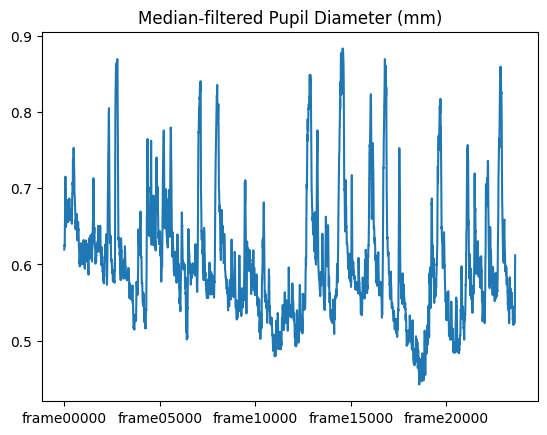

In [10]:
pickle_data = glob.glob(PROCESSED_DIR + '/**/*full.pickle', recursive=True)

file = pickle_data[6]

df = pd.DataFrame(pd.read_pickle(file)).T

pupil_trace = analyze_pupil_data(df, confidence_threshold=0.7)
# apply a median filter (window size = 5) and plot the result
filtered_trace = pupil_trace['pupil_diameter_mm'] \
    .rolling(window=10, center=True, min_periods=1) \
    .median()
filtered_trace.plot(title='Median-filtered Pupil Diameter (mm)')


In [31]:
dlc.filterpredictions(config_path, videolist[0])

Filtering with median model E:/jgronemeyer/250921_HFSA/data\sub-STREHAB07\ses-11\func\20250921_150902_sub-STREHAB07_ses-11_task-widefield_pupil.mp4
Saving filtered csv poses!
